In [1]:
# Add parent directory to path so imports work 😅
import sys
from pathlib import Path
parent_dir = Path().resolve().parent
sys.path.append(str(parent_dir))

In [2]:
import random
import numpy as np
from IPython.display import display
from utils import Solution

In [3]:
# Create a solution object
# Add your name, optional tags that identify the approach and optional description. 
# Note: There are silly defaults even if you miss these
soln = Solution()
print(soln.author)
print(soln.tags)
print(soln.desc)
print("---")

soln = Solution(author="Baby Yoda", tags=["force", "cuteness"], desc="Uses the power of the force and cuteness")
print(soln.author)
print(soln.tags)
print(soln.desc)

# All solution objects have a creation time set that implicitly acts as an id. It can also be used to calculate time taken for your solution run
print(f"Initiated at {soln.init_at}")

migos
['brrrr']
skrrrt
---
Baby Yoda
['force', 'cuteness']
Uses the power of the force and cuteness
Initiated at 2025-02-04 03:58:33.989520+00:00


In [4]:
# For notebook & other non-script flows, you can reset this initiation time before running the actual solution cell
soln.reset_init_time()
print(f"Initiated at {soln.init_at}")

Initiated at 2025-02-04 03:58:34.293444+00:00


In [5]:
# You can iterate over all the training examples
# Note: For now, the entire set is loaded into memory but with the use of more synthetic sets,
# the method will be changed to a generator that can be iterated over
# The return format is an object that holds the training data along with meta information like id and other niceties
sample = random.choice(soln.train_samples)

print(f"Sample ID: {sample.id}")
print(f"Arc Url: {sample.url}")
print(f"Num Train: {sample.ntrain}")
print(f"Input Size: {sample.inp_rows}x{sample.inp_cols}")
print(f"Output Size: {sample.inp_rows}x{sample.inp_cols}")
print("Sample - ")
print(sample.data)

Sample ID: 77fdfe62
Arc Url: https://arcprize.org/play?task=77fdfe62
Num Train: 3
Input Size: [8, 6, 8]x[8, 6, 8]
Output Size: [8, 6, 8]x[8, 6, 8]
Sample - 
{'train': [{'input': [[2, 1, 0, 0, 0, 0, 1, 3], [1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 8, 0, 0, 1, 0], [0, 1, 8, 8, 0, 8, 1, 0], [0, 1, 0, 0, 8, 0, 1, 0], [0, 1, 8, 0, 8, 8, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [4, 1, 0, 0, 0, 0, 1, 6]], 'output': [[0, 2, 0, 0], [2, 2, 0, 3], [0, 0, 6, 0], [4, 0, 6, 6]]}, {'input': [[9, 1, 0, 0, 1, 4], [1, 1, 1, 1, 1, 1], [0, 1, 8, 8, 1, 0], [0, 1, 8, 0, 1, 0], [1, 1, 1, 1, 1, 1], [2, 1, 0, 0, 1, 3]], 'output': [[9, 4], [2, 0]]}, {'input': [[6, 1, 0, 0, 0, 0, 1, 2], [1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 8, 0, 8, 1, 0], [0, 1, 8, 8, 8, 0, 1, 0], [0, 1, 8, 0, 8, 8, 1, 0], [0, 1, 8, 8, 8, 0, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1], [7, 1, 0, 0, 0, 0, 1, 4]], 'output': [[0, 6, 0, 2], [6, 6, 2, 0], [7, 0, 4, 4], [7, 7, 4, 0]]}], 'test': [{'input': [[3, 1, 0, 0, 0, 0, 0, 0, 1, 4], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0

Arc Url: https://arcprize.org/play?task=77fdfe62
Training sample


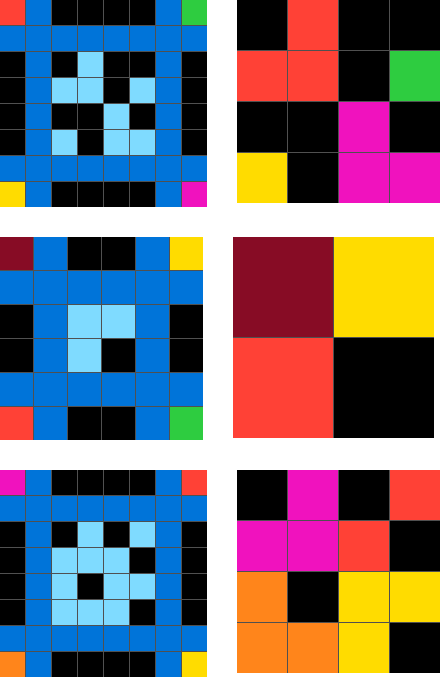

In [6]:
# You can also render the training & test samples for a visual feel
# If you want to play around, you can go to the associated link
print(f"Arc Url: {sample.url}")
print("Training sample")
display(sample.render_train())

Sample ID: 8cb8642d
Arc Url: https://arcprize.org/play?task=8cb8642d
Num Train: 3
Input Size: [15, 14, 18]x[12, 13, 17]
Output Size: [15, 14, 18]x[12, 13, 17]
Evaluation sample


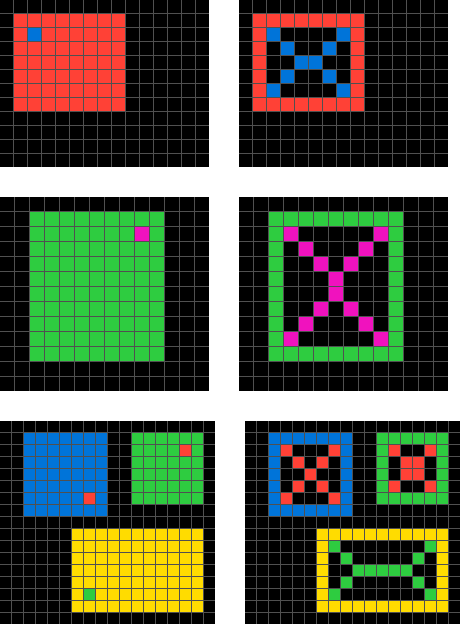

In [7]:
# Similarly, you can iterate over all the test examples
sample = random.choice(soln.test_samples)
print(f"Sample ID: {sample.id}")
print(f"Arc Url: {sample.url}")
print(f"Num Train: {sample.ntrain}")
print(f"Input Size: {sample.inp_rows}x{sample.inp_cols}")
print(f"Output Size: {sample.inp_rows}x{sample.inp_cols}")
print("Evaluation sample")
display(sample.render_train())

Match? False


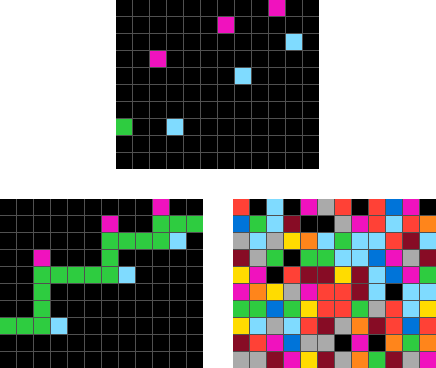

In [8]:
# After your model is trained & ready to go, you can simply append your prediction to the sample and get some stats. 
sample = random.choice(soln.test_samples)

# Here, the output solution is simply a random assignment of a 0-9 value for each cell with the same size as the input!
# A match probability here is 1 in 10^total_cells
sample.predicted = np.random.randint(0, 10, size=(len(sample.test_inp), len(sample.test_inp[0]))).tolist()

# As soon as predicted is set, the match stats are calculated
print(f"Match? {sample.match}")

display(sample.render_test())

In [9]:
# These sample-wise stats will also be rolled up to the overall solution stats (only on evaluation set)
sample = random.choice(soln.test_samples)

# Here, the output solution is simply a random assignment of a 0-9 value for each cell with the same size as the input!
# A match probability here is 1 in 10^total_cells
for sample in soln.test_samples:
    sample.predicted = np.random.randint(0, 10, size=(len(sample.test_inp), len(sample.test_inp[0]))).tolist()

print(f"Score by ways of random assignment: {soln.total_correct()} of {len(soln.test_samples)}")

Score by ways of random assignment: 0 of 400


In [10]:
# If you cheated, you could copy the actual answer directly as prediction
for sample in soln.test_samples:
    sample.predicted = sample.test_out

print(f"Score by ways of cheating: {soln.total_correct()} of {len(soln.test_samples)}")

Score by ways of cheating: 400 of 400


In [11]:
# Finally you can choose to write this to a file. 
# NOTE: Depending on how things go, will add a way to roll up & visualize progress across different methods into the streamlit ui
soln.commit()